# Basic code

In [1]:
epochs = 20
batch_size = 512
lr = 1e-3

In [2]:
import tensorflow as tf
import numpy as np
# num_words=10000 only keep the top 10,000 most frequently occurring words in the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(25000,) (25000,) (25000,) (25000,)


In [3]:
print(type(x_train[0]), type(y_train[0]), type(x_test[0]), type(y_test[0]))

<class 'list'> <class 'numpy.int64'> <class 'list'> <class 'numpy.int64'>


In [4]:
#x_train은 하나의 review
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [5]:
#y_train 값의 의미
#0 : negative review, 1: positive review
for i in range(10) : 
    print(y_train[i])

1
0
0
1
0
0
1
0
1
0


In [6]:
#highly frequent word 10000개를 골라 dic 형태로 만들어 놓은 것.
word2int = tf.keras.datasets.imdb.get_word_index(path='imdb_word_index.json')

In [7]:
for key, value in {'one' : 1, 'two' : 2}.items() :
    print(key, value)

one 1
two 2


In [9]:
#밑에처럼 하면 전부 다 나옴...
# for key, value in word2int.items() : 
#     print(key, value)

keys = list(word2int.keys())
for i in range(2,5) :
    print(keys[i], word2int[keys[i]])

nunnery 52007
sonja 16816
vani 63951


In [10]:
int2word = dict([(value, key) for (key, value) in word2int.items()])

In [11]:
#밑에처럼 하면 전부 다 나옴
# for key, value in int2word.items() : 
#     print(key, value)

for i in range(2, 5) :
    print(i, int2word[i])

2 and
3 a
4 of


In [11]:
# We decode the review; note that our indices were offset by 3 because
# 0 - "padding" ??????????
# 1 - "start of sequence"
# 2 - "unknown".
print(x_train[0])
print(' '.join([int2word.get(i - 3, '?') for i in x_train[0]])) #??????????
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
? this film was just brilliant casting location scenery stor

In [18]:
int2word[34701]

'fawn'

In [21]:
#negative review
print(x_train[1])
print(' '.join([int2word.get(i - 3, '?') for i in x_train[1]])) #dict.get(k, default_value) : default value for missing keys
print(y_train[1])

[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 8163, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 8255, 2, 349, 2637, 148, 605, 2, 8003, 15, 123, 125, 68, 2, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 8255, 5, 2, 656, 245, 2350, 5, 4, 9837, 131, 152, 491, 18, 2, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]
? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but th

In [22]:
#unknown word가 얼마나 있을까
for i in x_train[0]:
    if i in {0,1,2}:
        print(i)

1
2
2
2
2
2
2


In [23]:
for i in x_train[3]:
    if i in {0,1,2}:
        print(i)

1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


굉장히 많은 unknown word...

In [24]:
#길이가 다른 review들을 어떻게 처리할까?
#단순히 word를 숫자로 바꾸는 게 아니라 나온 숫자들을 vectorize해서 표시!
a = np.zeros((2,10))
print(a)
a[0,[1,2,1,2]] = 1
print(a)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


1과 2가 각각 두 번 나왔지만 1이라고 표시됨. 즉, 중복여부는 나오지 않는다.

In [30]:
#함수화해보았다.
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  
    return results

In [29]:
#예를 들자면 이런 식(함수는 dim=10으로 줄여서 출력해보았다).
a = [[1,1,2,2], [3,4,5,5]]
print(vectorize_sequences(a))

[[0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]]


In [31]:
#review의 길이(review의 단어 수)
for i in x_train[:10]:
    print(np.array(i).shape)

(218,)
(189,)
(141,)
(550,)
(147,)
(43,)
(123,)
(562,)
(233,)
(130,)


이렇게 일정하지 않은 review들도 vectorize function을 통해 10000개의 일정한 크기로 바꿔줄 수 있다!

In [32]:
x_train = vectorize_sequences(x_train) 
x_test = vectorize_sequences(x_test)

In [33]:
for i in x_train[:10]:
    print(i.sum())

120.0
121.0
97.0
238.0
97.0
35.0
90.0
294.0
133.0
87.0


In [35]:
tf.reset_default_graph()
tf.set_random_seed(0)
np.random.seed(0)

In [36]:
x = tf.placeholder(tf.float32, (None,10000)) 
y = tf.placeholder(tf.float32, (None,1)) 

init_b = tf.keras.initializers.constant(0.0)
init_w = tf.keras.initializers.VarianceScaling(mode='fan_avg')

b1 = tf.get_variable('b1', (16,), tf.float32, init_b)
w1 = tf.get_variable('w1', (10000,16), tf.float32, init_w)

b2 = tf.get_variable('b2', (16,), tf.float32, init_b)
w2 = tf.get_variable('w2', (16,16), tf.float32, init_w)

b3 = tf.get_variable('b3', (1,), tf.float32, init_b)
w3 = tf.get_variable('w3', (16,1), tf.float32, init_w)

x1 = tf.nn.relu(x @ w1 + b1) 
x2 = tf.nn.relu(x1 @ w2 + b2) 
logits = x2 @ w3 + b3 #(None, 1)
y_pred = tf.cast(logits>0.5, tf.float32, name='y_pred_cls') 

entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits) #(None, 1) 
loss = tf.reduce_mean(entropy) # ()
train = tf.train.RMSPropOptimizer(lr).minimize(loss)

correct = (tf.abs(y-y_pred)<0.1) 
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [37]:
def shuffle_batch(x, y, batch_size):
    rnd_idx = np.random.permutation(len(x))
    n_batches = len(x) // batch_size #딱 안 떨어져도 알아서 최대한 균일하게 잘라줌
    for batch_idx in np.array_split(rnd_idx, n_batches):
        yield x[batch_idx], y[batch_idx]

In [39]:
y_train = y_train.astype(np.float32).reshape((-1,1))
y_test = y_test.astype(np.float32).reshape((-1,1))
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(25000, 10000) (25000, 1) (25000, 10000) (25000, 1)


In [40]:
with tf.Session() as sess:
    init.run()
    #saver.restore(sess, 'save/nn.ckpt')
    
    loss_trace = []
    accuracy_trace = []

    for i in range(epochs):
        print()
        print('epoch {}/{}'.format(i, epochs), end=' ')
        for x_batch, y_batch in shuffle_batch(x_train, y_train, batch_size):
            feed_dict = {x: x_batch, y: y_batch}
            loss_run, accuracy_run, _ = sess.run([loss, accuracy, train], feed_dict=feed_dict)
            loss_trace.append(loss_run)
            accuracy_trace.append(accuracy_run)

    feed_dict = {x: x_test, y: y_test}
    accuracy_run, y_test_pred = sess.run([accuracy, y_pred], feed_dict=feed_dict)
    
    saver.save(sess, 'save/nn.ckpt') #graph structure와 weight가 save


epoch 0/20 
epoch 1/20 
epoch 2/20 
epoch 3/20 
epoch 4/20 
epoch 5/20 
epoch 6/20 
epoch 7/20 
epoch 8/20 
epoch 9/20 
epoch 10/20 
epoch 11/20 
epoch 12/20 
epoch 13/20 
epoch 14/20 
epoch 15/20 
epoch 16/20 
epoch 17/20 
epoch 18/20 
epoch 19/20 

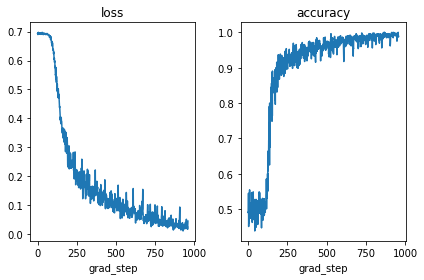

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(loss_trace)
ax2.plot(accuracy_trace)
ax1.set_title('loss')
ax2.set_title('accuracy')
ax1.set_xlabel('grad_step')
ax2.set_xlabel('grad_step')
plt.tight_layout()
plt.show()

In [42]:
print('Test Accuracy :', accuracy_run)

Test Accuracy : 0.84608


In [43]:
#confusion matrix???
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)

[[11277  1223]
 [ 2625  9875]]


# Keras code

In [44]:
tf.reset_default_graph()
tf.set_random_seed(0)
np.random.seed(0)

In [45]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) #keras는 batch size를 생각 안 해줘도 됨.
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
#keras는 여기가 graph인데, tensorflow는 graph structure에서 error가 많이 뜨는데 keras는 이 부분이 깔끔!

if 1:
    model.compile(optimizer='rmsprop', #tensorflow의 RMSProp. 여기서는 lr 맘대로 지정이 안되나 봄.
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
elif 1:
    from keras import optimizers
    model.compile(optimizer=optimizers.RMSprop(lr=lr),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
else:
    from keras import optimizers
    from keras import losses
    from keras import metrics
    model.compile(optimizer=optimizers.RMSprop(lr=0.001),
                  loss=losses.binary_crossentropy,
                  metrics=[metrics.binary_accuracy])

Using TensorFlow backend.


In [46]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 7s 450us/step - loss: 0.5241 - accuracy: 0.7871 - val_loss: 0.3994 - val_accuracy: 0.8686
Epoch 2/20
15000/15000 [==============================] - 6s 387us/step - loss: 0.3221 - accuracy: 0.8988 - val_loss: 0.3276 - val_accuracy: 0.8728
Epoch 3/20
15000/15000 [==============================] - 3s 200us/step - loss: 0.2331 - accuracy: 0.9235 - val_loss: 0.2810 - val_accuracy: 0.8889
Epoch 4/20
15000/15000 [==============================] - 3s 199us/step - loss: 0.1810 - accuracy: 0.9409 - val_loss: 0.2829 - val_accuracy: 0.8859
Epoch 5/20
15000/15000 [==============================] - 3s 208us/step - loss: 0.1471 - accuracy: 0.9532 - val_loss: 0.2864 - val_accuracy: 0.8848
Epoch 6/20
15000/15000 [==============================] - 3s 224us/step - loss: 0.1220 - accuracy: 0.9625 - val_loss: 0.3097 - val_accuracy: 0.8799
Epoch 7/20
15000/15000 [==============================] - 3s 

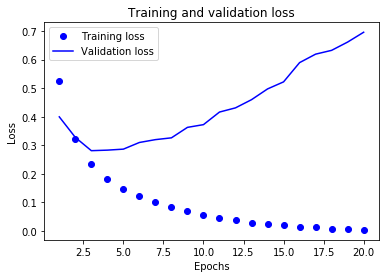

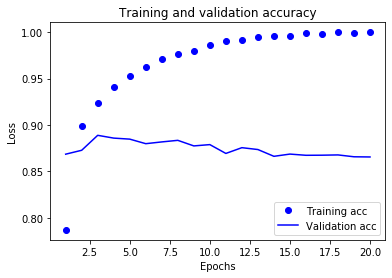

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # clear figure
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [48]:
results = model.evaluate(x_test, y_test)
print(results) # [loss, accuracy]

25000/25000 [==============================] - 7s 277us/step
[0.752682795381546, 0.850600004196167]


In [49]:
model.predict(x_test)

array([[0.00797006],
       [1.        ],
       [0.997833  ],
       ...,
       [0.00278151],
       [0.01460767],
       [0.85174906]], dtype=float32)

# Mix code

In [50]:
tf.reset_default_graph()
tf.set_random_seed(0)
np.random.seed(0)

In [51]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1)) 
#여기까지 keras code. 대신 sigmoid는 안 넣어줬다.

#keras에 빨대 꽂기
x = model.input
y = tf.placeholder(tf.float32, (None,1)) 

#tensorflow code.
logits = model.output
y_pred = tf.cast(logits>0.5, tf.float32, name='y_pred_cls') 

entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits) 
loss = tf.reduce_mean(entropy) 
train = tf.train.RMSPropOptimizer(lr).minimize(loss)

correct = (tf.abs(y-y_pred)<0.1) 
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
saver = tf.train.Saver()

나머지 부분은 basic code 그대로! 딱히 error가 생기는 부분이 아니라서 그냥 쓰면 됩니다.

In [ ]:
#loss function 종류
entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=logits)
entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits)